<a href="https://colab.research.google.com/github/2303a52239/GEN-AI/blob/main/gen_ai_10_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 28ms/step - accuracy: 0.9152 - loss: 0.2875 - val_accuracy: 0.9753 - val_loss: 0.0706
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9850 - loss: 0.0492 - val_accuracy: 0.9877 - val_loss: 0.0358
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 27ms/step - accuracy: 0.9913 - loss: 0.0311 - val_accuracy: 0.9897 - val_loss: 0.0340
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9945 - loss: 0.0193 - val_accuracy: 0.9901 - val_loss: 0.0327
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9958 - loss: 0.0140 - val_accuracy: 0.9906 - val_loss: 0.0329
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 29ms/step - accuracy: 0.9968 - loss: 0.0102 - val_accuracy: 0.9901 - val_loss: 0.0382
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9974 - loss: 0.0080 - val_accuracy: 0.9903 - val_loss: 0.0393
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9977 -

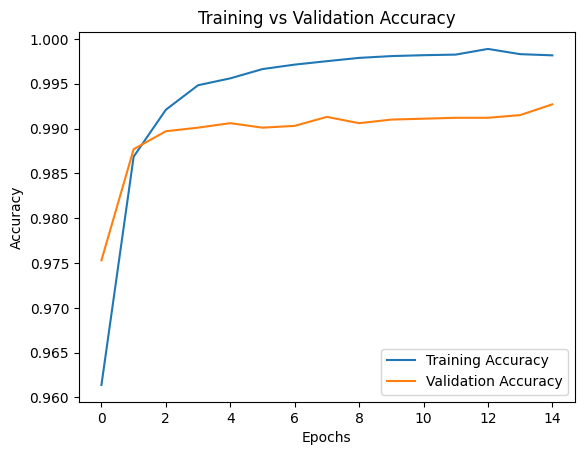

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# Define a more efficient CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model with faster settings
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train using prefetching for speed-up
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32).prefetch(tf.data.experimental.AUTOTUNE)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32).prefetch(tf.data.experimental.AUTOTUNE)

history = model.fit(train_dataset, epochs=15, validation_data=test_dataset)  # Reduce epochs to 15 for faster training

# Evaluate the model
train_loss, train_acc = model.evaluate(train_dataset, verbose=2)
test_loss, test_acc = model.evaluate(test_dataset, verbose=2)
print(f'Training Accuracy: {train_acc:.4f}')
print(f'Test Accuracy: {test_acc:.4f}')

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()
